# Load packages

In [2]:
import hssm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import arviz as az  # Visualization
import pytensor  # Graph-based tensor library
import bambi as bmb
import os
import sys
import time

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Import data

In [3]:
model = az.InferenceData.from_netcdf('../output/Model3')

# Model summary

In [7]:
# Parameter estimates
pd.set_option('display.max_rows', 500)
az.summary(model, var_names=['~a','~t', '~z'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v_Intercept,3.076,0.095,2.890,3.282,0.028,0.021,13.0,16.0,1.25
v_Congruency[incongruent],-0.564,0.024,-0.610,-0.519,0.001,0.000,1789.0,1373.0,1.00
v_mbased_efficacy_prev,0.091,0.052,-0.010,0.184,0.002,0.001,694.0,1106.0,1.00
v_mbased_reward_prev,0.080,0.054,-0.015,0.184,0.002,0.001,658.0,976.0,1.00
v_mbased_efficacy_prev:mbased_reward_prev,0.270,0.176,-0.051,0.596,0.006,0.004,894.0,1223.0,1.00
a_mbased_efficacy_prev,0.009,0.012,-0.013,0.032,0.000,0.000,652.0,1193.0,1.00
a_mbased_reward_prev,0.000,0.014,-0.025,0.026,0.001,0.000,578.0,810.0,1.00
a_mbased_efficacy_prev:mbased_reward_prev,-0.046,0.044,-0.126,0.037,0.002,0.001,738.0,1044.0,1.01
p_outlier,0.010,0.000,0.010,0.010,0.000,0.000,1913.0,1277.0,1.00
v_1|subject_sigma,0.565,0.059,0.455,0.673,0.011,0.008,31.0,132.0,1.11


# Traces

/users/igrahek/.conda/envs/hssm_gpu/lib/python3.10/site-packages/arviz/plots/traceplot.py:217: UserWarning: rcParams['plot.max_subplots'] (16) is smaller than the number of variables to plot (17), generating only 16 plots
  warnings.warn(


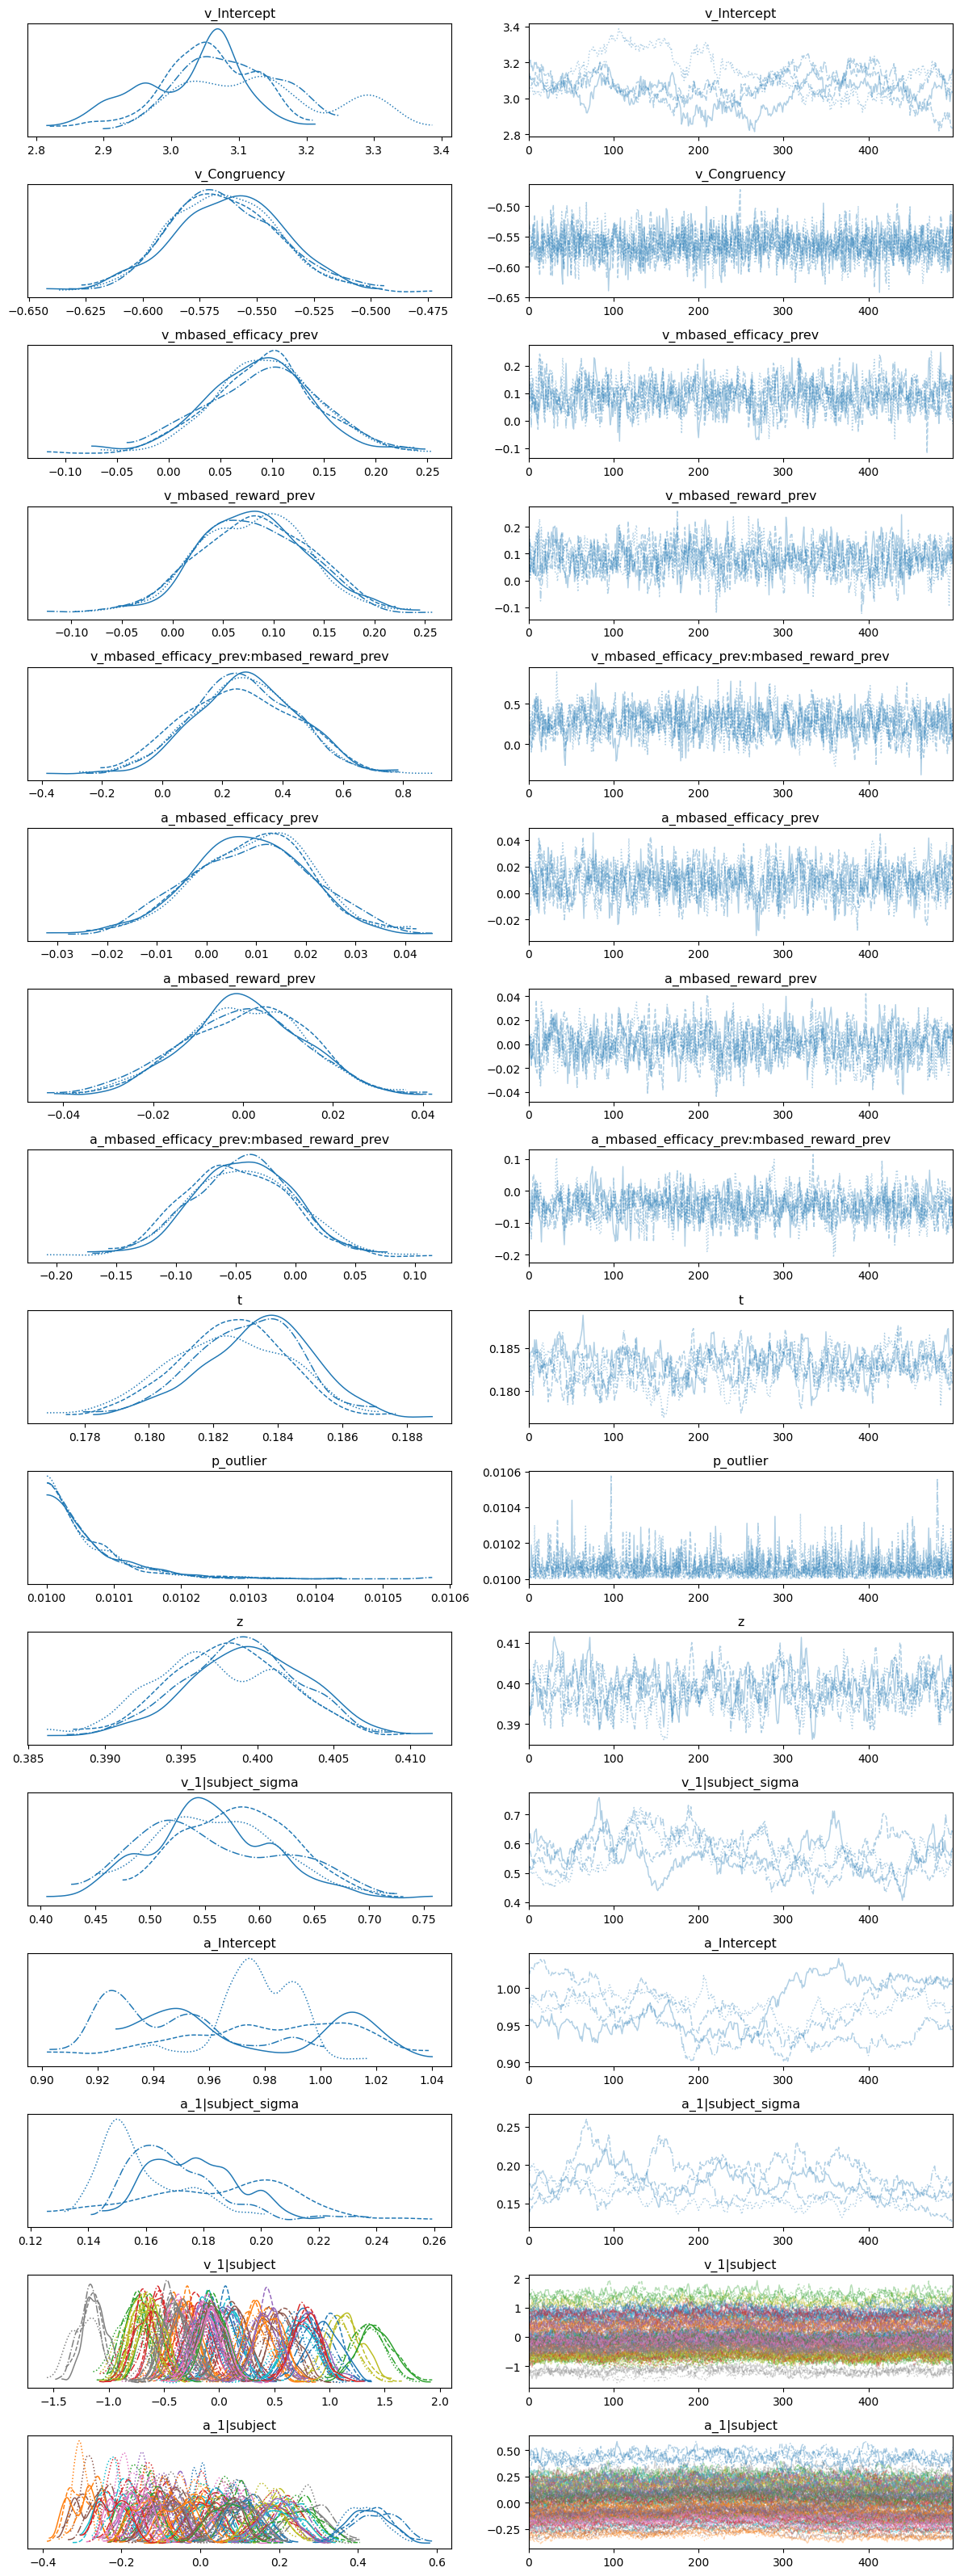

In [12]:
# PLot the traces
az.rcParams["plot.max_subplots"] = 32
az.plot_trace(model)
plt.tight_layout()
plt.show()

# Stats

/users/igrahek/.conda/envs/hssm_gpu/lib/python3.10/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (88) in plot_posterior, generating only 20 plots
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

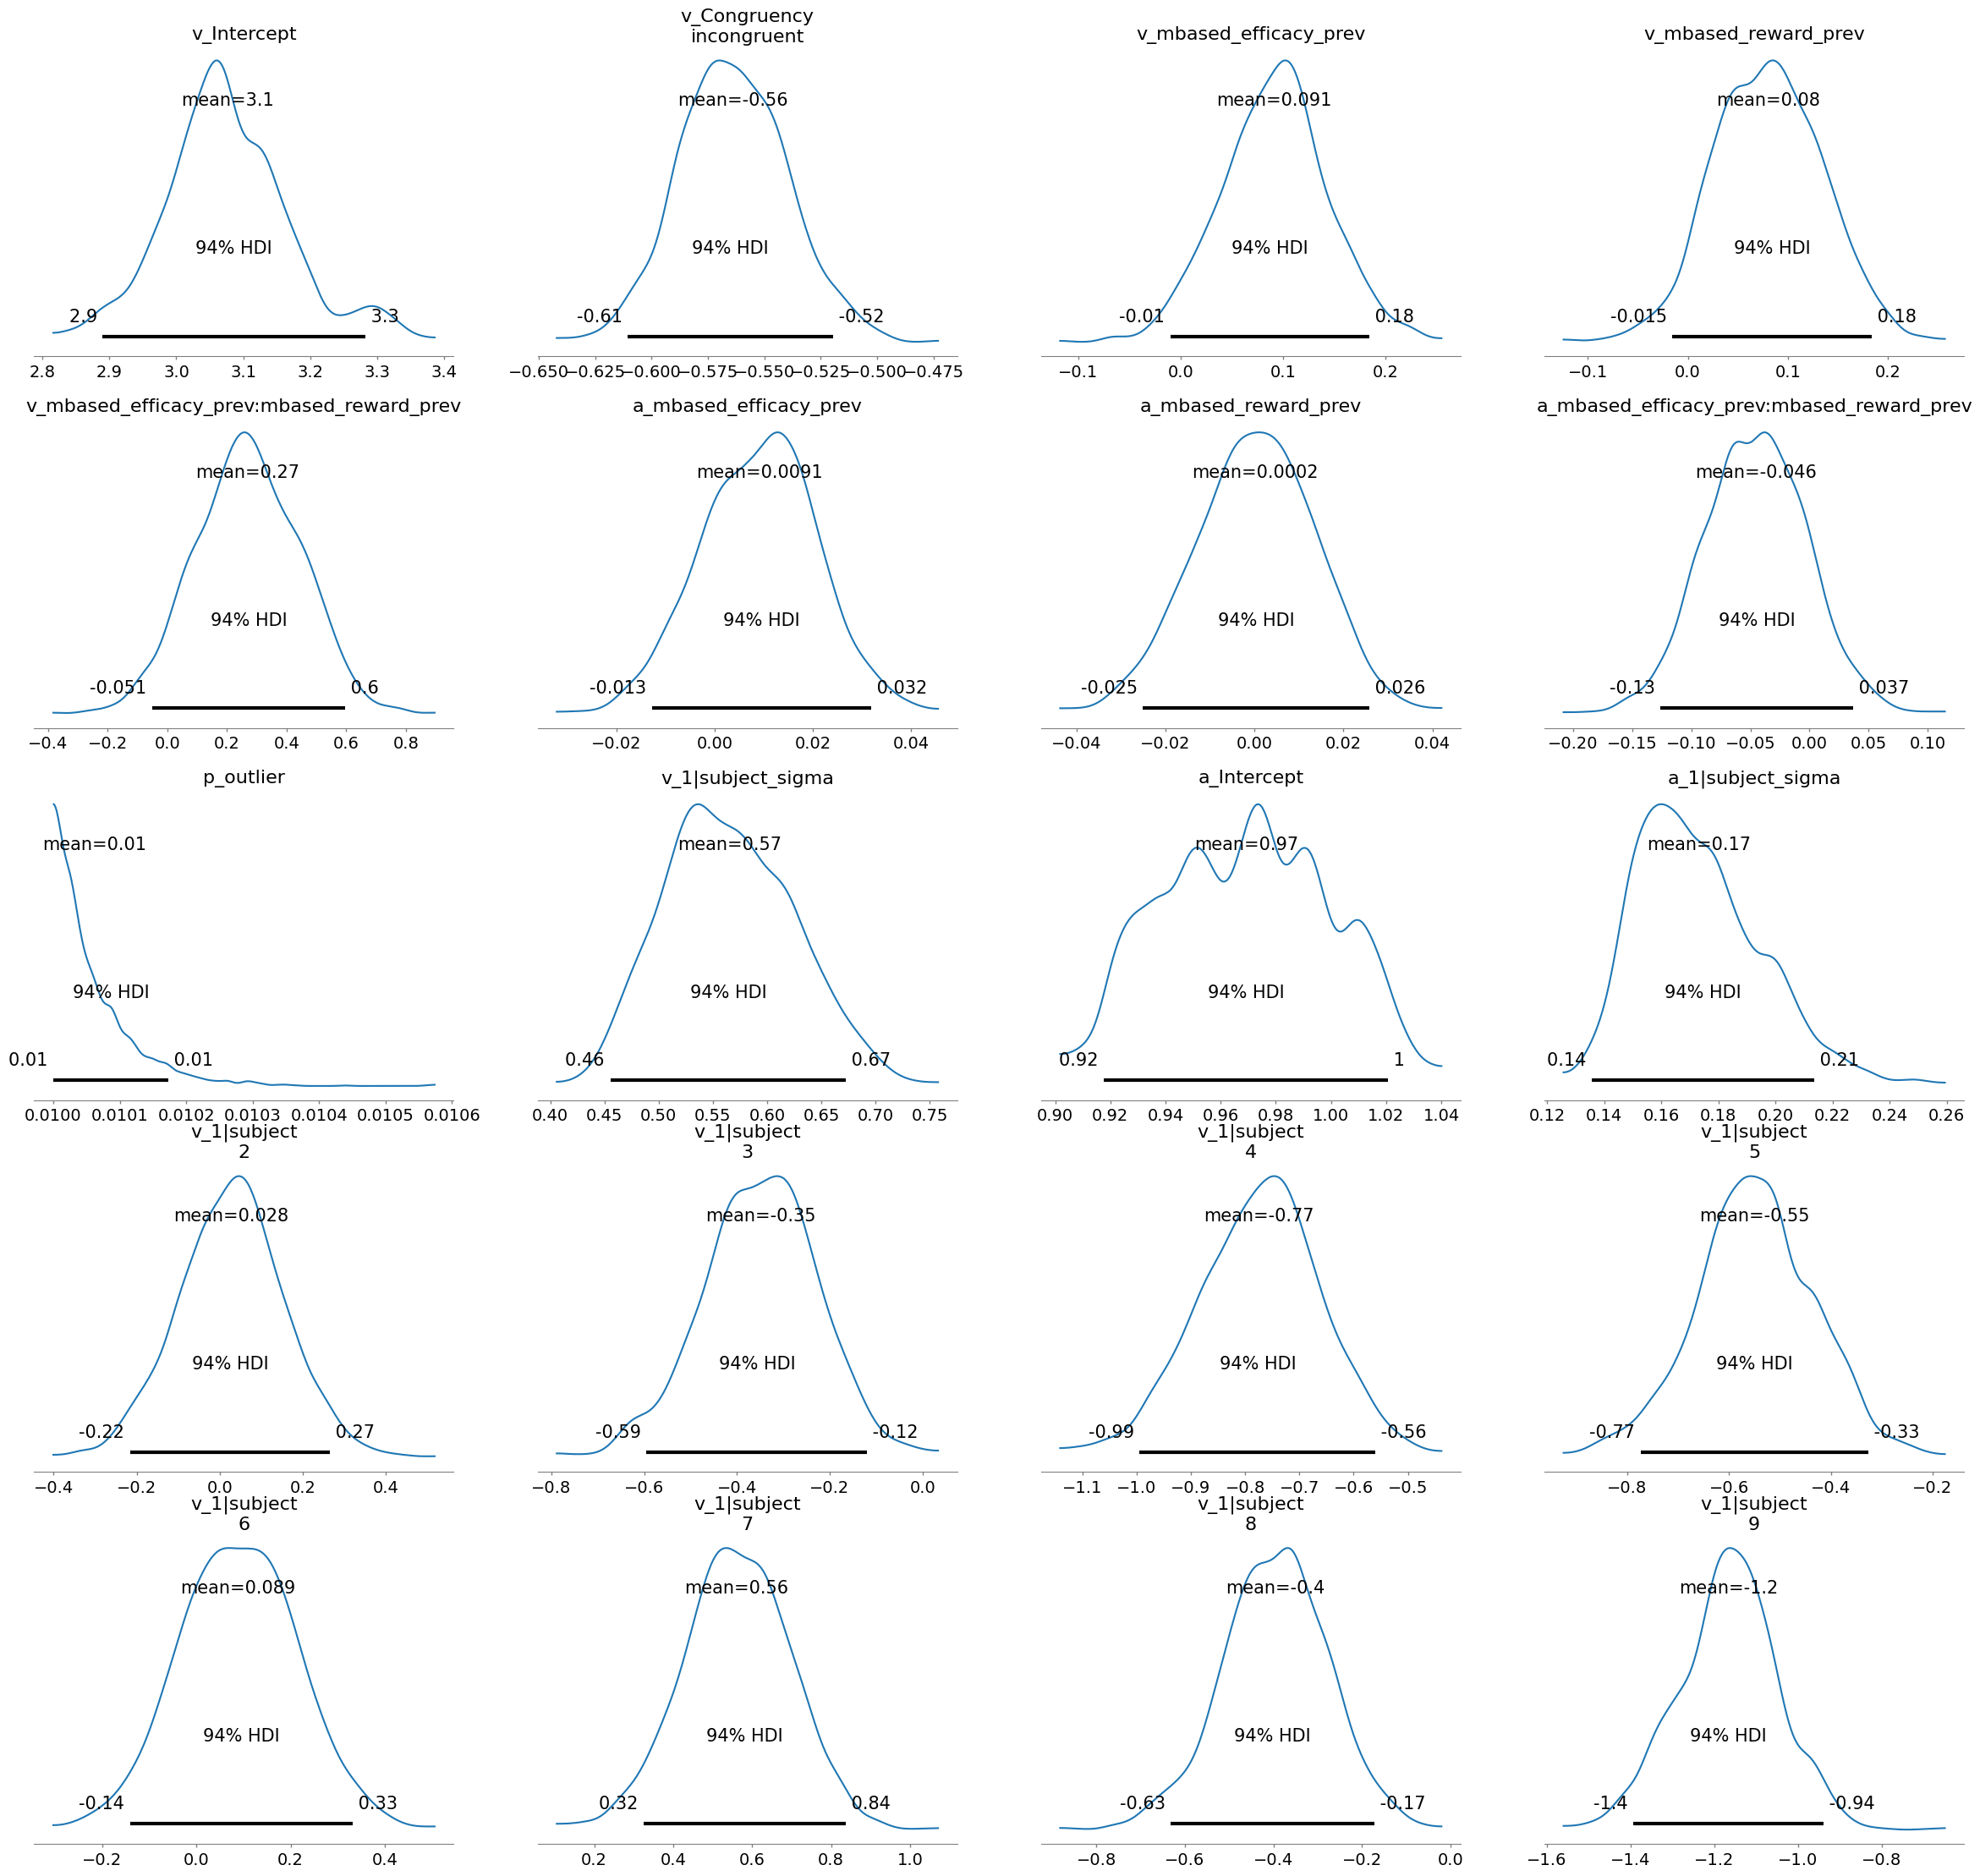

In [16]:
# Plot the posteriors
az.rcParams["plot.max_subplots"] = 20
az.plot_posterior(model, var_names=['~a','~t', '~z'])
plt.tight_layout

# Plot predictions

## Create conditions

In [21]:
#### Drift ####

# Extract the means
v_Intercept = (az.extract(model,var_names = 'v_Intercept',combined=True)).mean().values
v_Efficacy = (az.extract(model,var_names = 'v_mbased_efficacy_prev',combined=True)).mean().values
v_Reward = (az.extract(model,var_names = 'v_mbased_reward_prev',combined=True)).mean().values
v_EfficacyXReward = (az.extract(model,var_names = 'v_mbased_efficacy_prev:mbased_reward_prev',combined=True)).mean().values

# Predict the values
efficacy_vals = np.linspace(-0.5,0.5,100)
reward_vals_low = np.linspace(-0.5,-0.5,100)
reward_vals_high = np.linspace(0.5,0.5,100)

Drift_low_reward = v_Intercept + efficacy_vals*v_Efficacy + reward_vals_low*v_Reward + efficacy_vals*reward_vals_low*v_EfficacyXReward
Drift_high_reward = v_Intercept + efficacy_vals*v_Efficacy + reward_vals_high*v_Reward + efficacy_vals*reward_vals_high*v_EfficacyXReward

#### Threshold ####

# Extract the means
a_Intercept = (az.extract(model,var_names = 'a_Intercept',combined=True)).mean().values
a_Efficacy = (az.extract(model,var_names = 'a_mbased_efficacy_prev',combined=True)).mean().values
a_Reward = (az.extract(model,var_names = 'a_mbased_reward_prev',combined=True)).mean().values
a_EfficacyXReward = (az.extract(model,var_names = 'a_mbased_efficacy_prev:mbased_reward_prev',combined=True)).mean().values

# Predict the values
efficacy_vals = np.linspace(-0.5,0.5,100)
reward_vals_low = np.linspace(-0.5,-0.5,100)
reward_vals_high = np.linspace(0.5,0.5,100)

Threshold_low_reward = a_Intercept + efficacy_vals*a_Efficacy + reward_vals_low*a_Reward + efficacy_vals*reward_vals_low*a_EfficacyXReward
Threshold_high_reward = a_Intercept + efficacy_vals*a_Efficacy + reward_vals_high*a_Reward + efficacy_vals*reward_vals_high*a_EfficacyXReward


## Plot

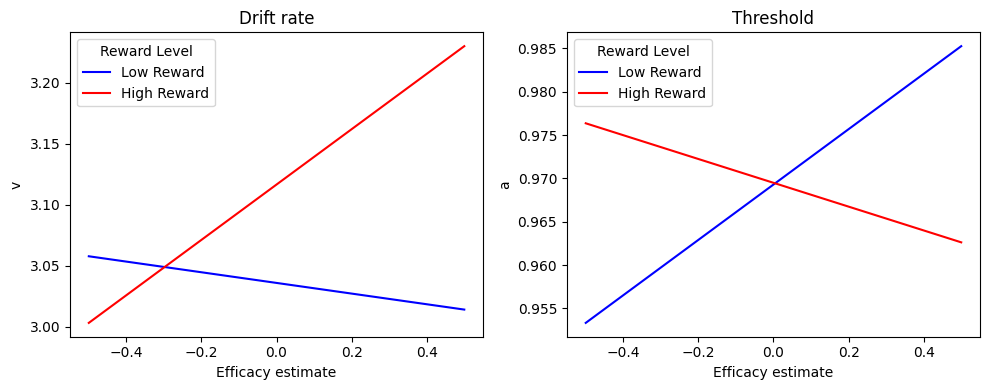

In [22]:
# Create a figure and subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot on the first subplot
axes[0].plot(efficacy_vals, Drift_low_reward, color='blue', label='Low Reward')
axes[0].plot(efficacy_vals, Drift_high_reward, color='red', label='High Reward')
axes[0].set_xlabel('Efficacy estimate')
axes[0].set_ylabel('v')
axes[0].set_title('Drift rate')
axes[0].legend(title='Reward Level')

# Plot on the second subplot
axes[1].plot(efficacy_vals, Threshold_low_reward, color='blue', label='Low Reward')
axes[1].plot(efficacy_vals, Threshold_high_reward, color='red', label='High Reward')
axes[1].set_xlabel('Efficacy estimate')
axes[1].set_ylabel('a')
axes[1].set_title('Threshold')
axes[1].legend(title='Reward Level')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()